In [46]:
import numpy as np
import time

# Real Test Data
latitudes = [24.978861,   24.977837, 24.9786539,  24.9824954,  24.9829233,  24.9801122,  24.9808523,  24.9780304,   24.9723401, 24.9692866,  24.9883232,  25.002963,    25.0059,     25.0046281, 25.0024311, 24.9934346, 24.9894715,  24.9891035, 24.9864704, 24.9843279,   24.9849494,  24.9864132,  24.9850802,  24.9826312, 24.9784446]
longitudes = [121.445101, 121.4397533, 121.4413305, 121.4481755, 121.4531965, 121.4525293, 121.4577859, 121.4429091, 121.4366318, 121.4336462, 121.4604908, 121.4612308 ,121.4597508, 121.4540859, 121.45281,  121.455719, 121.464898, 121.4617674, 121.4604863, 121.4588263, 121.4565258,121.4539816, 121.4520058, 121.4511005, 121.4505008]
labels = ["日月光", "水上鮮餐廳", "阿婆壽司", "運動中心", "新北市中正國中", "阿城鵝肉", "家樂福", "芋頭之家", "鹿角公園", "土城國中", "海霸王餐廳", "南亞夜市", "板橋車站", "臺灣藝術大學", "中山國小", "臺北看守所", "麥當勞金城店", "胖老爹青雲店", "No.66", "新北地方法院", "廣福國小", "學成社區公園", "海山捷運站", "學府郵局", "土城醫院"]

# configuration
numOfPoints = 9 # numOfPoints doesn't contain source
# maxDistance = 20 
# speed = 50/60 # 50km/h
travelTime = 2000 # minutes


# create waypoints randomly 
np.random.seed(int(time.time()))
# latitudes = np.random.rand(numOfPoints) * maxDistance
# longitudes = np.random.rand(numOfPoints) * maxDistance|
stayTimes = np.random.rand(numOfPoints) * 40 # minutes
stayTimes = np.insert(stayTimes, 0, 0) # for source point

# get source, destination
# source = [np.mean(latitudes), np.mean(longitudes)]
# destination = source
source = [longitudes[0], latitudes[0]]
destination = source

# insert source into route
# latitudes = np.insert(latitudes, 0, source[0])
# latitudes = np.insert(latitudes, len(latitudes), source[0])

# longitudes = np.insert(longitudes, 0, source[1])
# longitudes = np.insert(longitudes, len(longitudes), source[1])

latitudes  = np.array(latitudes[:numOfPoints+1])
longitudes = np.array(longitudes[:numOfPoints+1])
labels     = np.array(labels[:numOfPoints+1])


In [47]:
print(f"latitudes : \n{latitudes}\n") 
print(f"longtitudes : \n{longitudes}\n")
print(f"stayTimes : \n{stayTimes}\n")
print(f"source : \n{source}\n")

latitudes : 
[24.978861  24.977837  24.9786539 24.9824954 24.9829233 24.9801122
 24.9808523 24.9780304 24.9723401 24.9692866]

longtitudes : 
[121.445101  121.4397533 121.4413305 121.4481755 121.4531965 121.4525293
 121.4577859 121.4429091 121.4366318 121.4336462]

stayTimes : 
[ 0.         16.23658656 34.21199101 20.37059503 20.85841112  4.24247799
  0.64799116 16.42556136  7.0105284  12.25094466]

source : 
[121.445101, 24.978861]



# Get disatnce Map

In [48]:
# longitudes = [-122.42, -122.45, -122.48]
# latitudes = [37.78, 37.91, 37.73]
print(f"latitudes : \n{latitudes}\n") 
print(f"longitudes : \n{longitudes}\n")


latitudes : 
[24.978861  24.977837  24.9786539 24.9824954 24.9829233 24.9801122
 24.9808523 24.9780304 24.9723401 24.9692866]

longitudes : 
[121.445101  121.4397533 121.4413305 121.4481755 121.4531965 121.4525293
 121.4577859 121.4429091 121.4366318 121.4336462]



In [49]:

# distanceMap = np.zeros((len(latitudes), len(latitudes)))
# for i in range(len(latitudes)):
#     for j in range(len(latitudes)):
#         distanceMap[i, j] =  np.sqrt(abs(latitudes[i] - latitudes[j])**2 + abs(longitudes[i] - longitudes[j])**2)

# print(f"distanceMap : ")        
# print(f"{distanceMap}")

# Get Time Map

In [50]:
# timeMap = distanceMap / speed

import json
from urllib import request

prefix = "https://api.mapbox.com/directions-matrix/v1/mapbox/"
profile = "driving/"
# profile = "driving-traffic/"
access_token = "access_token=pk.eyJ1IjoiYXM0Njg1NzkiLCJhIjoiY2tkcjJscDkzMWJobTJzbWgyZWpsbDl4cyJ9.03T640DTC8fhKTBZ4lVQxw"


durationMap_url = prefix + profile

for index in range(len(longitudes)):
    durationMap_url += f"{longitudes[index]},{latitudes[index]};"
    
durationMap_url = durationMap_url[:-1] + "?" + access_token
print(durationMap_url)


response = request.urlopen(durationMap_url)
data = json.loads(response.read().decode('utf-8'))
timeMap = np.array(data['durations'])

# durations or distances between points may not be symmetric 
# because the routes may differ by direction due to one-way street or turn restrictions.
print(f"timeMap :\n{timeMap} ") 


https://api.mapbox.com/directions-matrix/v1/mapbox/driving/121.445101,24.978861;121.4397533,24.977837;121.4413305,24.9786539;121.4481755,24.9824954;121.4531965,24.9829233;121.4525293,24.9801122;121.4577859,24.9808523;121.4429091,24.9780304;121.4366318,24.9723401;121.4336462,24.9692866?access_token=pk.eyJ1IjoiYXM0Njg1NzkiLCJhIjoiY2tkcjJscDkzMWJobTJzbWgyZWpsbDl4cyJ9.03T640DTC8fhKTBZ4lVQxw
timeMap :
[[   0.   201.8  141.1  331.8  339.6  399.1  535.   169.8  349.7 1345.1]
 [ 206.9    0.    74.2  265.9  360.3  423.7  542.6  106.7  169.1 1164.5]
 [ 142.    98.4    0.   261.5  271.8  331.3  491.8   32.5  196.  1191.4]
 [ 359.   311.3  342.6    0.   191.6  251.1  398.   309.   421.9 1215.4]
 [ 335.7  381.8  319.3  176.8    0.    85.5  238.4  285.7  492.4 1049.8]
 [ 310.8  321.   240.5  155.4   73.5    0.   227.5  206.9  417.8 1044.9]
 [ 470.2  498.2  453.8  314.8  232.9  196.2    0.   420.2  608.8 1136.6]
 [ 137.3  103.8   33.6  252.7  239.3  298.8  459.3    0.   229.6 1225. ]
 [ 410.1  199.1 

# Create route

In [51]:
def permute(points, lengthOfRoute, currTime):
    length = len(points)
    
#     print(f"current route : {points[:lengthOfRoute]}")
#     print(f"current time : {currTime}")
#     print(f"lengthOfRoute : {lengthOfRoute}")
#     print(f"maximum travelTime : {travelTime} \n")  
    
    if lengthOfRoute == length:
#         print(f"No aother waypoints !!")
#         print(f"save route : {points[:lengthOfRoute]}")
#         print(f"travel time : {currTime} \n")
        routes[lengthOfRoute-1][tuple(points[:lengthOfRoute])] = currTime + timeMap[points[lengthOfRoute-1], 0]
        return
    
    for i in range(lengthOfRoute, length):
        
        # swap points[i] and points[lengthOfRoute]
        points[i], points[lengthOfRoute] = points[lengthOfRoute], points[i]
        
        # add travel time between end point and new point
        extraTime = timeMap[points[lengthOfRoute-1], points[lengthOfRoute]]
        
        # add stayTime of new point
        extraTime += stayTimes[points[lengthOfRoute]]
        
        # add travel time between new point and destination(source)
        extraTime += timeMap[points[lengthOfRoute], 0]
        
        if (currTime + extraTime) > travelTime:
#             print(f"next point : {points[lengthOfRoute]}")
#             print(f"extra travel time : {timeMap[points[lengthOfRoute-1], points[lengthOfRoute]]}")
#             print(f"extra stayTime : {stayTimes[points[lengthOfRoute]]}")
#             print(f"extra return time : {timeMap[points[lengthOfRoute], 0]}")
#             print(f"save route : {points[:lengthOfRoute]}")
#             print(f"travel time : {currTime + extraTime} \n")
            routes[lengthOfRoute-1][tuple(points[:lengthOfRoute])] = currTime + timeMap[points[lengthOfRoute-1], 0]
        else:
            # substract travel time between new point and destination from time
            extraTime -= timeMap[points[lengthOfRoute], 0]
            permute(points, lengthOfRoute + 1, currTime + extraTime)
        
        # recover points to origin
        points[i], points[lengthOfRoute] = points[lengthOfRoute], points[i]        
            

In [52]:

# print(f"timeMap : ")
# print(f"{timeMap}\n")
# print(f"stayTimes : ")
# print(f"{stayTimes}\n")

# for routes which have 0 waypoints to numOfPoints waypoints(except for source and destination)
routes = [{} for _ in range(numOfPoints+1)]

start = time.time()
permute([x for x in range(numOfPoints+1)], 1, 0)
print(f"time : {time.time() - start}\n")

# print(f"routes : ")
# print(routes)

time : 0.1093740463256836



# Display routes

shortest path : 1892.5041426165922
[0 2 8 1 3 4 6 5 7 0]


Traceback (most recent call last):
  File "/home/junru468579/anaconda3/envs/hlp2020spring_hw2/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/home/junru468579/anaconda3/envs/hlp2020spring_hw2/lib/python3.8/site-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


<IPython.core.display.Javascript object>


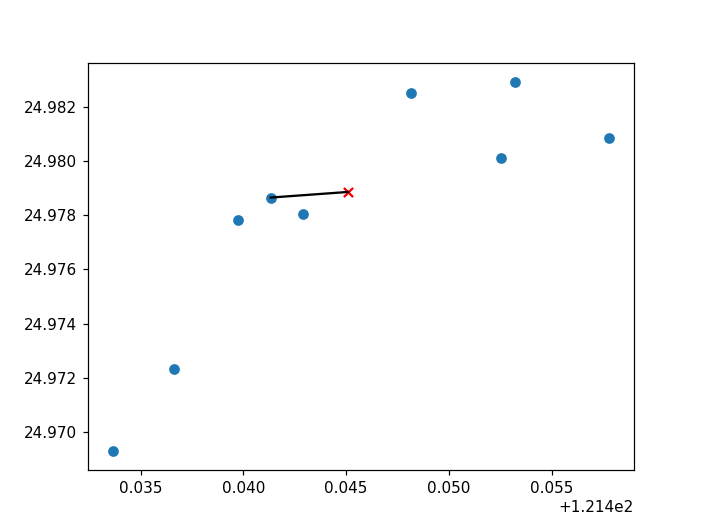

In [53]:

from matplotlib import pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook


def update(frames):
    
    global longitudes
    global latitudes
    global route
    # print(longitudes)
    line.set_data(longitudes[route[:frames]], latitudes[route[:frames]])
    return line, 

# print(longitudes)
# print(latitudes)

longest = []
for diff_len in routes[::-1]:
    if diff_len:
        longest = diff_len
        break
        
# print(r)            
# route = r.pop()
# print(longest.items())
sorted_routes = sorted(longest.items(), key=lambda d: d[1])
print(f"shortest path : {sorted_routes[0][1]}")

# get route which fits travel time the most
route = sorted_routes[0][0]

# insert destination to route
route = np.insert(route, len(route), 0)
print(route)

lngs = longitudes[route[0]]
lats = latitudes[route[0]]
fig, ax = plt.subplots()
plt.scatter(longitudes[0], latitudes[0], color="red", marker="x")
plt.scatter(longitudes[1:], latitudes[1:])
line,  = plt.plot(lngs, lats, color="black")
ani = animation.FuncAnimation(fig, update, frames=range(len(route) + 1) ,blit=True, interval=1000, repeat=True)


In [55]:
def permute(sequence, index=0):
    length = len(sequence)

    if index > length - 1:
        raise StopIteration

    if index == length - 1:
        yield sequence
    else:
        for i in range(index, length):
            sequence[i], sequence[index] = sequence[index], sequence[i]
            for permutation in permute(sequence, index + 1):
                yield permutation
            sequence[index], sequence[i] = sequence[i], sequence[index]

for permutation in permute([1, 2]):
    print(permutation)

[1, 2]
[2, 1]


1. complexity : O(n!) => if 25 waypoints, our algo would be slow (dangerous if someone attach server)
2. if someone set long travelTime but small waypoints could make distort route
3. whether nodejs could call python directly



4. 運算時間 4s 內
5. speed = 40 mile/per h
6. height = travel time * speed / const ratio

# Dijkstra algorithm

In [56]:
def minDistance(distances, shortest_path_tree):
    
    # initialize minimum distance for next node
    min = float("Inf")
    min_index = 0
    
    # search nearest vertex which is not in the shortest path tree
    for vertex in range(numOfPoints+1):
        if distances[vertex] < min and shortest_path_tree[vertex] == False:
            min = distances[vertex]
            min_vertex = vertex
            
    return min_vertex

def dijkstra(source):
    
    distances = [float("Inf") for _ in range(numOfPoints + 1)]
    distances[source] = 0
    shortest_path_tree = [False for _ in range(numOfPoints + 1)]
  
    # Since we need to append (numOfPoints + 1) vertex into shortest_path_tree eventually
    for _ in range(numOfPoints + 1):
        nextPoint = minDistance(distances, shortest_path_tree)
        shortest_path_tree[nextPoint] = True
        
        for vertex in range(numOfPoints + 1):
            if shortest_path_tree[vertex] == False and timeMap[nextPoint][vertex] > 0 and distances[vertex] > (distances[nextPoint] + timeMap[nextPoint][vertex] + stayTimes[vertex]):
                distances[vertex] = ( distances[nextPoint] + timeMap[nextPoint][vertex] + stayTimes[vertex] )
    return distances

In [57]:

distances = dijkstra(0)

# add time for return 
for index in range(len(distances)):
    distances[index] += timeMap[index][0]
print(distances)

[0.0, 424.93658656022427, 317.3119910073405, 711.1705950255812, 696.1584111151283, 714.1424779881447, 1005.8479911629076, 323.52556136015795, 766.8105283971076, 1776.7509446632807]


# Travel salesman problem

In [71]:
import random 
timemap = timeMap
nop = numOfPoints
routes = []

def travelSalesmanProblem(node, path, i, distance):
    
    global candidates
    
    # Add way point
    path[i] = node

    # Calculate path length from current to last node
    if len(path) > 1:
        distance += (timemap[path[i-1]][node] + stayTimes[node])
                                     
    # If path contains all cities and is not a dead end,
    # add path from last to first city and return.
    if (i == (nop)):
        
        global routes
        path[i+1] = (path[0])
        distance += timemap[path[i]][path[0]]
                                      
        # print(f"path: {path}, distance: {distance}")
        routes.append([distance, path])
        return

    # Fork paths for all possible cities not yet used
    for city in candidates:
        if (city not in path):
            travelSalesmanProblem(city, path[:], i+1, distance)

if __name__ == '__main__':
    start = time.time()
    candidates = np.array(range(nop+1))
    while True:
        path = [0 for _ in range(nop + 2)]
        travelSalesmanProblem(0, path, 0, 0)
        routes = sorted(routes, key=lambda d:d[0])
        # print(routes)
        
        if routes[0][0] < travelTime:
            break
        else:
            index_rm   = random.randint(1, nop)
            candidates = np.delete(candidates, index_rm)
            # print(timemap)
            nop -= 1
    print(f"time : {time.time() - start}\n")

time : 8.077995300292969



# Display routes

In [72]:

from matplotlib import pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook


def update(frames):
    
    global longitudes
    global latitudes
    global route
    # print(longitudes)
    line.set_data(longitudes[route[:frames]], latitudes[route[:frames]])
    return line, 

# print(longitudes)
# print(latitudes)

longest = []
for diff_len in routes[::-1]:
    if diff_len:
        longest = diff_len
        break
        
# print(r)            
# route = r.pop()
# print(longest.items())
# sorted_routes = sorted(longest.items(), key=lambda d: d[1])
print(f"shortest path : {routes[0]}")

# get route which fits travel time the most
route = routes[0][1]

# insert destination to route
# route = np.insert(route, len(route), 0)
print(route)

lngs = longitudes[route[0]]
lats = latitudes[route[0]]
fig, ax = plt.subplots()
plt.scatter(longitudes[0], latitudes[0], color="red", marker="x")
plt.scatter(longitudes[1:], latitudes[1:])
line,  = plt.plot(lngs, lats, color="black")
ani = animation.FuncAnimation(fig, update, frames=range(len(route) + 1) ,blit=True, interval=1000, repeat=True)


shortest path : [1814.1875312235052, [0, 1, 9, 0]]
[0, 1, 9, 0]


<IPython.core.display.Javascript object>

# 2 - approximate Travel salesman problem